In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [9]:
df = pd.read_csv(r"C:\Sqi_projects\Machine_learning\Fetal data.xls")

In [11]:
df.shape

(1700, 21)

In [13]:
df.head(5)

,PregnancyType,FetalPresentation,FetalStatus,PlacentaPosition,PlacentaMaturity,CervicalOS,FetalAnomalies,BPD_mm,CRL_mm,FL_mm,...,AC_mm,SuspectedSex,AvgFetalAge_weeks,AFI_category,AFI_cm,EFW_kg,CervicalLength_cm,FetalHeartRate_bpm,HighRisk,RiskReason
0,Singleton,Oblique,Live,Posterior,Mature,Closed,Nil,81,183,61,...,279,F,35,Adequate,11.6,2.99,4.8,130,0,NaN
1,Singleton,Oblique,Live,Posterior,Mature,Closed,Nil,75,157,50,...,238,M,30,Reduced,3.2,2.00,2.4,120,1,AFI_OutOfRange;Low_EFW;ShortCervix
2,Twins,Cephalic,Live,Posterior,Mature,Closed,Nil,102,197,69,...,304,M,39,Adequate,15.4,3.45,5.1,125,1,MultiplePregnancy
3,Singleton,Oblique,Live,Anterior,Mature,Closed,Nil,81,160,63,...,279,M,34,Adequate,10.6,2.46,4.4,106,1,AbnormalFHR;Low_EFW
4,Singleton,Breech,Live,Anterior,Mature,Closed,Nil,43,80,31,...,123,M,16,Increased,24.2,0.38,4.2,134,1,AFI_OutOfRange;Low_EFW;ExtremeGestAge;NonCepha...


In [15]:
df.tail(5)

,PregnancyType,FetalPresentation,FetalStatus,PlacentaPosition,PlacentaMaturity,CervicalOS,FetalAnomalies,BPD_mm,CRL_mm,FL_mm,...,AC_mm,SuspectedSex,AvgFetalAge_weeks,AFI_category,AFI_cm,EFW_kg,CervicalLength_cm,FetalHeartRate_bpm,HighRisk,RiskReason
1695,Singleton,Cephalic,Live,Left Lateral,Mature,Closed,Specific,58,109,39,...,183,M,23,Adequate,14.4,1.32,5.7,162,1,FetalAnomaly;AbnormalFHR;Low_EFW
1696,Singleton,Transverse,Live,Left Lateral,Mature,Closed,Nil,29,62,21,...,92,M,12,Adequate,9.7,0.30,5.4,138,1,Low_EFW;ExtremeGestAge
1697,Singleton,Breech,Live,Right Lateral,Mature,Closed,Nil,49,100,34,...,173,F,20,Adequate,11.4,1.46,3.4,124,1,Low_EFW;NonCephalicPresentation
1698,Twins,Oblique,Live,Right Lateral,Mature,Closed,Nil,87,152,58,...,253,F,32,Adequate,14.9,2.26,2.9,121,1,MultiplePregnancy;Low_EFW
1699,Singleton,Breech,Live,Right Lateral,Mature,Open,Normal,38,81,29,...,137,M,16,Adequate,15.3,0.72,1.7,154,1,Low_EFW;ShortCervix;ExtremeGestAge;NonCephalic...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PregnancyType       1700 non-null   object 
 1   FetalPresentation   1700 non-null   object 
 2   FetalStatus         1700 non-null   object 
 3   PlacentaPosition    1700 non-null   object 
 4   PlacentaMaturity    1700 non-null   object 
 5   CervicalOS          1700 non-null   object 
 6   FetalAnomalies      1700 non-null   object 
 7   BPD_mm              1700 non-null   int64  
 8   CRL_mm              1700 non-null   int64  
 9   FL_mm               1700 non-null   int64  
 10  HC_mm               1700 non-null   int64  
 11  AC_mm               1700 non-null   int64  
 12  SuspectedSex        1700 non-null   object 
 13  AvgFetalAge_weeks   1700 non-null   int64  
 14  AFI_category        1700 non-null   object 
 15  AFI_cm              1700 non-null   float64
 16  EFW_kg

In [19]:
df.isnull()

,PregnancyType,FetalPresentation,FetalStatus,PlacentaPosition,PlacentaMaturity,CervicalOS,FetalAnomalies,BPD_mm,CRL_mm,FL_mm,...,AC_mm,SuspectedSex,AvgFetalAge_weeks,AFI_category,AFI_cm,EFW_kg,CervicalLength_cm,FetalHeartRate_bpm,HighRisk,RiskReason
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

PregnancyType           0
FetalPresentation       0
FetalStatus             0
PlacentaPosition        0
PlacentaMaturity        0
CervicalOS              0
FetalAnomalies          0
BPD_mm                  0
CRL_mm                  0
FL_mm                   0
HC_mm                   0
AC_mm                   0
SuspectedSex            0
AvgFetalAge_weeks       0
AFI_category            0
AFI_cm                  0
EFW_kg                  0
CervicalLength_cm       0
FetalHeartRate_bpm      0
HighRisk                0
RiskReason            108
dtype: int64

In [23]:
# Drop RiskReason column
df = df.drop(columns=['RiskReason'])

# Check unique values for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    print("\n")


PregnancyType: 3 unique values
PregnancyType
Singleton    1436
Twins         209
Triplets       55
Name: count, dtype: int64


FetalPresentation: 5 unique values
FetalPresentation
Cephalic      351
Floating      346
Breech        345
Oblique       336
Transverse    322
Name: count, dtype: int64


FetalStatus: 2 unique values
FetalStatus
Live        1666
Not Live      34
Name: count, dtype: int64


PlacentaPosition: 5 unique values
PlacentaPosition
Fundal           366
Posterior        347
Left Lateral     340
Right Lateral    336
Anterior         311
Name: count, dtype: int64


PlacentaMaturity: 2 unique values
PlacentaMaturity
Mature      1466
Immature     234
Name: count, dtype: int64


CervicalOS: 2 unique values
CervicalOS
Closed    1545
Open       155
Name: count, dtype: int64


FetalAnomalies: 4 unique values
FetalAnomalies
Nil         1381
Normal       153
Abnormal      89
Specific      77
Name: count, dtype: int64


SuspectedSex: 2 unique values
SuspectedSex
M    859
F    841
N

In [31]:
# Drop RiskReason to avoid data leakage
if 'RiskReason' in df.columns:
    df = df.drop(columns=['RiskReason'])
else:
    print("RiskReason already dropped or not found.")


RiskReason already dropped or not found.


In [33]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

In [37]:
# Separate binary and multi-class categorical columns
binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]
multi_class_cols = [col for col in categorical_cols if df[col].nunique() > 2]

In [39]:
# Label encode binary categorical columns
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [41]:
# One-hot encode multi-class categorical columns
df = pd.get_dummies(df, columns=multi_class_cols)

In [43]:
# Define features X and target y
X = df.drop(columns=['HighRisk'])
y = df['HighRisk']

In [47]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print("Data encoding and split done. Ready for modeling.")

Data encoding and split done. Ready for modeling.


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train, predict, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    print(f"--- {name} ---")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.4f}")
    print("\n")


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy:  0.9382
Precision: 0.9433
Recall:    0.9937
F1 Score:  0.9678
ROC AUC:   0.9555


--- Random Forest ---
Accuracy:  0.9735
Precision: 0.9813
Recall:    0.9906
F1 Score:  0.9859
ROC AUC:   0.9919


--- XGBoost ---
Accuracy:  0.9912
Precision: 0.9968
Recall:    0.9937
F1 Score:  0.9953
ROC AUC:   0.9981




C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:46:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


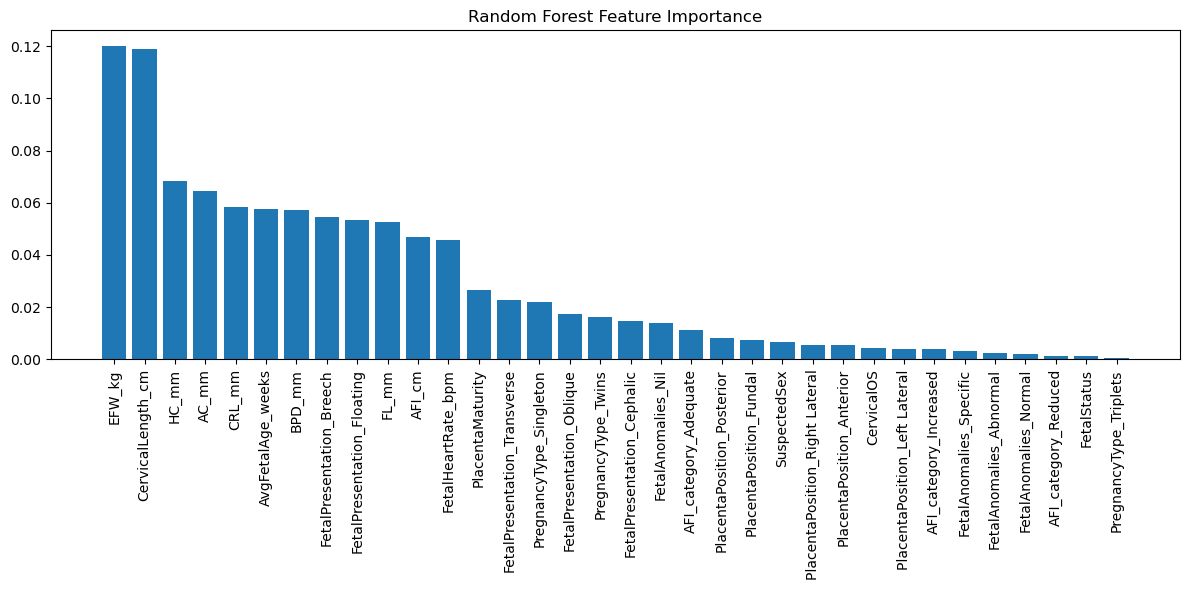

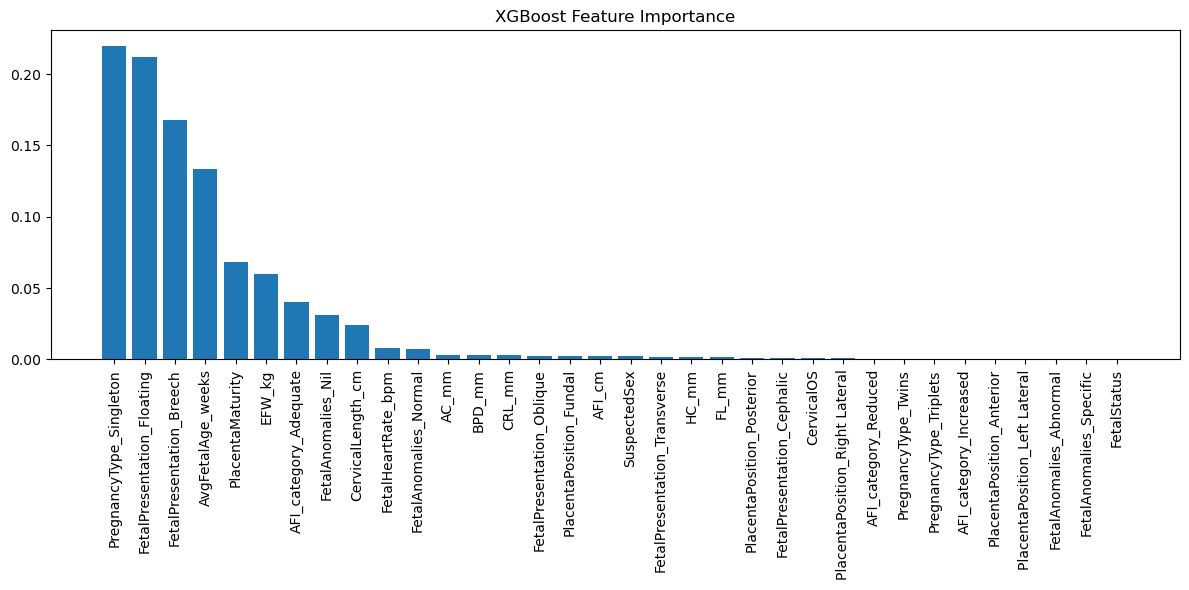

In [53]:
def plot_feature_importance(model, X, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X.columns
    
    plt.figure(figsize=(12,6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), features[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Plot for Random Forest
plot_feature_importance(models['Random Forest'], X_train, "Random Forest Feature Importance")

# Plot for XGBoost
plot_feature_importance(models['XGBoost'], X_train, "XGBoost Feature Importance")

In [55]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Run grid search on training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print(f"Best F1 score from CV: {grid_search.best_score_:.4f}")

# Use best estimator to predict test set
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best F1 score from CV: 0.9949
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.99      1.00       318

    accuracy                           0.99       340
   macro avg       0.94      1.00      0.97       340
weighted avg       0.99      0.99      0.99       340



C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:55:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [57]:
import joblib

# Save the best model
joblib.dump(best_xgb, 'xgboost_best_model.joblib')

# Prediction function example
def predict_high_risk(input_data):
    # input_data should be a processed DataFrame matching training features
    prediction = best_xgb.predict(input_data)
    return prediction

print("Model saved and prediction function ready.")


Model saved and prediction function ready.


In [59]:
import joblib

model = joblib.load('xgboost_best_model.joblib')
print("Model loaded successfully.")


Model loaded successfully.


In [65]:
import pandas as pd

# Create a dict for your input sample with all numeric features filled
sample_dict = {
    # Numeric features (replace with realistic values)
    'BPD_mm': 90,
    'CRL_mm': 60,
    'FL_mm': 45,
    'HC_mm': 320,
    'AC_mm': 280,
    'AvgFetalAge_weeks': 30,
    'AFI_cm': 12.5,
    'EFW_kg': 2.8,
    'CervicalLength_cm': 3.5,
    'FetalHeartRate_bpm': 140,
    
    # Label encoded binary features (0 or 1)
    'FetalStatus': 1,        # e.g. Live=1, Not Live=0 (depends on encoding)
    'SuspectedSex': 0,       # e.g. M=0, F=1 (check your encoding)
    'CervicalOS': 0,         # e.g. Closed=0, Open=1
    'PlacentaMaturity': 1,   # Mature=1, Immature=0
    
    # One-hot encoded multi-class features — set 1 for the category present, 0 otherwise
    'PregnancyType_Singleton': 1,
    'PregnancyType_Twins': 0,
    'PregnancyType_Triplets': 0,
    
    'FetalPresentation_Cephalic': 0,
    'FetalPresentation_Floating': 1,
    'FetalPresentation_Breech': 0,
    'FetalPresentation_Oblique': 0,
    'FetalPresentation_Transverse': 0,
    
    'PlacentaPosition_Fundal': 1,
    'PlacentaPosition_Posterior': 0,
    'PlacentaPosition_Left Lateral': 0,
    'PlacentaPosition_Right Lateral': 0,
    'PlacentaPosition_Anterior': 0,
    
    'FetalAnomalies_Nil': 1,
    'FetalAnomalies_Normal': 0,
    'FetalAnomalies_Abnormal': 0,
    'FetalAnomalies_Specific': 0,
    
    'AFI_category_Adequate': 1,
    'AFI_category_Increased': 0,
    'AFI_category_Reduced': 0
}

# Convert dict to DataFrame with one row
sample_input = pd.DataFrame([sample_dict])

print(sample_input)


   BPD_mm  CRL_mm  FL_mm  HC_mm  AC_mm  AvgFetalAge_weeks  AFI_cm  EFW_kg  \
0      90      60     45    320    280                 30    12.5     2.8   

   CervicalLength_cm  FetalHeartRate_bpm  ...  PlacentaPosition_Left Lateral  \
0                3.5                 140  ...                              0   

   PlacentaPosition_Right Lateral  PlacentaPosition_Anterior  \
0                               0                          0   

   FetalAnomalies_Nil  FetalAnomalies_Normal  FetalAnomalies_Abnormal  \
0                   1                      0                        0   

   FetalAnomalies_Specific  AFI_category_Adequate  AFI_category_Increased  \
0                        0                      1                       0   

   AFI_category_Reduced  
0                     0  

[1 rows x 34 columns]


In [ ]:
sample_input = sample_input[X_train.columns]
prediction = model.predict(sample_input)
print("Prediction (HighRisk):", prediction[0])


In [83]:
sample_dict_low_risk_2 = {
    'BPD_mm': 50,
    'CRL_mm': 40,
    'FL_mm': 30,
    'HC_mm': 260,
    'AC_mm': 230,
    'AvgFetalAge_weeks': 18,
    'AFI_cm': 15.0,
    'EFW_kg': 1.2,
    'CervicalLength_cm': 5.0,
    'FetalHeartRate_bpm': 120,
    'FetalStatus': 1,
    'SuspectedSex': 1,
    'CervicalOS': 0,
    'PlacentaMaturity': 1,
    'PregnancyType_Singleton': 1,
    'PregnancyType_Twins': 0,
    'PregnancyType_Triplets': 0,
    'FetalPresentation_Cephalic': 1,
    'FetalPresentation_Floating': 0,
    'FetalPresentation_Breech': 0,
    'FetalPresentation_Oblique': 0,
    'FetalPresentation_Transverse': 0,
    'PlacentaPosition_Fundal': 0,
    'PlacentaPosition_Posterior': 1,
    'PlacentaPosition_Left Lateral': 0,
    'PlacentaPosition_Right Lateral': 0,
    'PlacentaPosition_Anterior': 0,
    'FetalAnomalies_Nil': 1,
    'FetalAnomalies_Normal': 0,
    'FetalAnomalies_Abnormal': 0,
    'FetalAnomalies_Specific': 0,
    'AFI_category_Adequate': 1,
    'AFI_category_Increased': 0,
    'AFI_category_Reduced': 0
}

sample_input_low_risk_2 = pd.DataFrame([sample_dict_low_risk_2])
sample_input_low_risk_2 = sample_input_low_risk_2[X_train.columns]

prediction = model.predict(sample_input_low_risk_2)
print("Prediction (HighRisk):", prediction[0])


Prediction (HighRisk): 1


In [85]:
print(df['HighRisk'].value_counts(normalize=True))


HighRisk
1    0.936471
0    0.063529
Name: proportion, dtype: float64


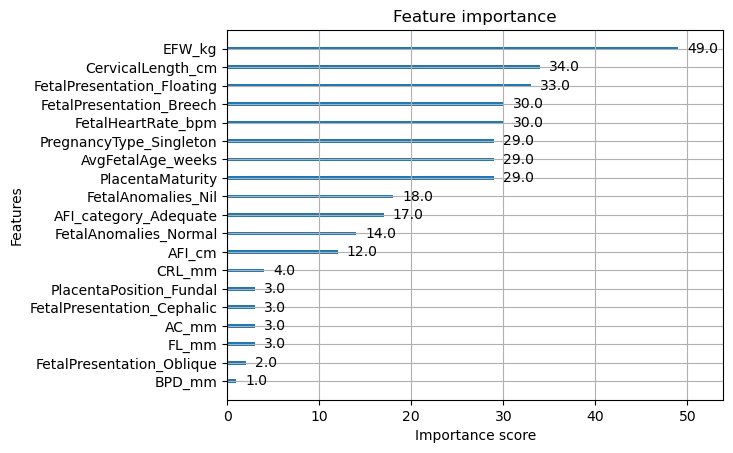

In [87]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.show()


In [89]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Calculate scale_pos_weight = (number of 0s) / (number of 1s)
num_zeros = sum(y_train == 0)
num_ones = sum(y_train == 1)
scale_pos_weight = num_zeros / num_ones

model_balanced = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model_balanced.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_balanced.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.91      0.65        22
           1       0.99      0.94      0.96       318

    accuracy                           0.94       340
   macro avg       0.75      0.92      0.80       340
weighted avg       0.96      0.94      0.94       340



C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [91]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train XGBoost on balanced data
model_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_smote.fit(X_train_res, y_train_res)

# Predict on test set
y_pred_smote = model_smote.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred_smote))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89        22
           1       1.00      0.99      0.99       318

    accuracy                           0.99       340
   macro avg       0.92      0.97      0.94       340
weighted avg       0.99      0.99      0.99       340



C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:10:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [93]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# Get predicted probabilities for positive class
probs = model_smote.predict_proba(X_test)[:, 1]

# Compute precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, probs)

# Find best threshold based on max F1 score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best threshold: {best_threshold:.3f}, F1 score: {f1_scores[best_idx]:.3f}")

# Predict using best threshold
y_pred_thresh = (probs >= best_threshold).astype(int)

# Print classification report for tuned threshold
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_thresh))


Best threshold: 0.401, F1 score: 0.992
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.99      0.99      0.99       318

    accuracy                           0.99       340
   macro avg       0.93      0.95      0.94       340
weighted avg       0.99      0.99      0.99       340



In [95]:
import joblib

# Save model to file
joblib.dump(model_smote, 'xgb_smote_model.pkl')
print("Model saved as xgb_smote_model.pkl")


Model saved as xgb_smote_model.pkl


In [101]:
import pandas as pd
import joblib

# Load your saved model (adjust path if needed)
model = joblib.load('xgb_smote_model.pkl')

# Sample input dictionary (make sure keys match all features used in your model)
sample_dict = {
    'FetalStatus': 1,
    'PlacentaMaturity': 1,
    'CervicalOS': 0,
    'BPD_mm': 90,
    'CRL_mm': 60,
    'FL_mm': 45,
    'HC_mm': 320,
    'AC_mm': 280,
    'SuspectedSex': 0,
    'AvgFetalAge_weeks': 30,
    'AFI_cm': 12.5,
    'EFW_kg': 2.8,
    'CervicalLength_cm': 3.5,
    'FetalHeartRate_bpm': 140,
    'PregnancyType_Singleton': 1,
    'PregnancyType_Triplets': 0,
    'PregnancyType_Twins': 0,
    'FetalPresentation_Breech': 0,
    'FetalPresentation_Cephalic': 0,
    'FetalPresentation_Floating': 1,
    'FetalPresentation_Oblique': 0,
    'FetalPresentation_Transverse': 0,
    'PlacentaPosition_Anterior': 0,
    'PlacentaPosition_Fundal': 1,
    'PlacentaPosition_Left Lateral': 0,
    'PlacentaPosition_Posterior': 0,
    'PlacentaPosition_Right Lateral': 0,
    'FetalAnomalies_Abnormal': 0,
    'FetalAnomalies_Nil': 1,
    'FetalAnomalies_Normal': 0,
    'FetalAnomalies_Specific': 0,
    'AFI_category_Adequate': 1,
    'AFI_category_Increased': 0,
    'AFI_category_Reduced': 0
}

# Convert to DataFrame
sample_input = pd.DataFrame([sample_dict])

# Reorder columns to match model expected order exactly
expected_cols = model.get_booster().feature_names
sample_input = sample_input[expected_cols]

# Predict probability
prob = model.predict_proba(sample_input)[:, 1][0]

# Apply threshold if you want, e.g. 0.401 from your tuning
threshold = 0.401
prediction = int(prob >= threshold)

print("Predicted probability for HighRisk:", prob)
print("Predicted HighRisk class (0=Low, 1=High):", prediction)


Predicted probability for HighRisk: 0.98737913
Predicted HighRisk class (0=Low, 1=High): 1


In [103]:
import pandas as pd
import joblib

# Load your saved model (adjust the path if needed)
model = joblib.load('xgb_smote_model.pkl')

# Sample input likely to predict Low Risk (0)
sample_dict = {
    'FetalStatus': 1,             # Live
    'PlacentaMaturity': 1,        # Mature
    'CervicalOS': 0,              # Closed
    'BPD_mm': 100,                # Normal size values
    'CRL_mm': 70,
    'FL_mm': 55,
    'HC_mm': 350,
    'AC_mm': 300,
    'SuspectedSex': 0,            # Male
    'AvgFetalAge_weeks': 32,
    'AFI_cm': 14.0,               # Normal AFI
    'EFW_kg': 3.2,                # Normal estimated fetal weight
    'CervicalLength_cm': 4.5,     # Longer cervix (safer)
    'FetalHeartRate_bpm': 140,
    'PregnancyType_Singleton': 1,
    'PregnancyType_Triplets': 0,
    'PregnancyType_Twins': 0,
    'FetalPresentation_Breech': 0,
    'FetalPresentation_Cephalic': 1,
    'FetalPresentation_Floating': 0,
    'FetalPresentation_Oblique': 0,
    'FetalPresentation_Transverse': 0,
    'PlacentaPosition_Anterior': 1,
    'PlacentaPosition_Fundal': 0,
    'PlacentaPosition_Left Lateral': 0,
    'PlacentaPosition_Posterior': 0,
    'PlacentaPosition_Right Lateral': 0,
    'FetalAnomalies_Abnormal': 0,
    'FetalAnomalies_Nil': 1,
    'FetalAnomalies_Normal': 0,
    'FetalAnomalies_Specific': 0,
    'AFI_category_Adequate': 1,
    'AFI_category_Increased': 0,
    'AFI_category_Reduced': 0
}

# Convert dict to DataFrame (1 row)
sample_input = pd.DataFrame([sample_dict])

# Predict probability of High Risk (class 1)
prob = model.predict_proba(sample_input)[:, 1][0]

# Use your tuned threshold (from earlier)
threshold = 0.401

# Predict class with threshold
pred_class = 1 if prob >= threshold else 0

print(f"Predicted probability for HighRisk: {prob:.6f}")
print(f"Predicted HighRisk class (0=Low, 1=High): {pred_class}")


Predicted probability for HighRisk: 0.019414
Predicted HighRisk class (0=Low, 1=High): 0
